In [2]:
from IPython.display import HTML, display
html_code = """ 
<h1 style='background-color: black;
color: blue; font-size: 30px;
border-radius: 20px;
padding: 16px;
text-align: center;'>

<b style='color: white;
'> Titanic Survivor Prediction </b> With Python Classification </h1>
"""

display(HTML(html_code))

In [ ]:
import numpy as np # Álgebra lineal
import pandas as pd # Dataframes y operaciones sobre ellos
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Gráficos estadísticos

from sklearn.model_selection import train_test_split # Dividir los datos en entrenamiento y prueba
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay # Métricas para evaluar el modelo
from sklearn.tree import DecisionTreeClassifier # Árbol de decisión como clasificador
from sklearn.naive_bayes import GaussianNB # Bayes ingenuo gaussiano
from sklearn.neighbors import KNeighborsClassifier # K vecinos cercanos como clasificador
from sklearn.preprocessing import StandardScaler, LabelEncoder # Procesar valores
from sklearn.impute import SimpleImputer # Imputar valores NA
from xgboost import XGBClassifier # XGBoost como clasificador
import warnings 

warnings.filterwarnings("ignore") # Ignorar las advertencias de sklearn

pd.set_option("display.max_columns", None) # Mostrar todas las columnas de los datasets
plt.style.use("ggplot") # Estilo de gráficos

## **CARGA DE DATOS**

In [4]:
# Datos para entrenar y validar nuestros modelos
ruta_train = r"C:\Users\Educa informatica\Downloads\Titanic_train.csv"
# Dataset de entrenamiento
titanic_train = pd.read_csv(ruta_train)

In [5]:
html_code = """ 
<h1 style='background-color: darkgreen;
color: white; font-size: 30px;
border-radius: 20px;
padding: 16px;
text-align: center;'>

<b style='color: white;
'> EDA </b> (Análisis Exploratorio de Datos) </h1>
"""

display(HTML(html_code))

In [6]:
# Estructura de los datos de entrenamiento
def estructura_dataset(df):
    print(f"Cantidad de filas: {df.shape[0]}")
    print(f"Cantidad de columnas: {df.shape[1]}")
    print(f"Cantidad de datos: {df.size}")
    print(f"Cantidad de valores nulos: {df.isnull().sum().sum()}")
    print(f"Columnas: {df.columns}")
    
estructura_dataset(titanic_train)

Cantidad de filas: 891
Cantidad de columnas: 12
Cantidad de datos: 10692
Cantidad de valores nulos: 866
Columnas: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
# Primera vista de los datos
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Valores duplicados
titanic_train.duplicated().sum()

0

In [9]:
# Valores nulos por columna
titanic_train.isnull().sum() / len(titanic_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

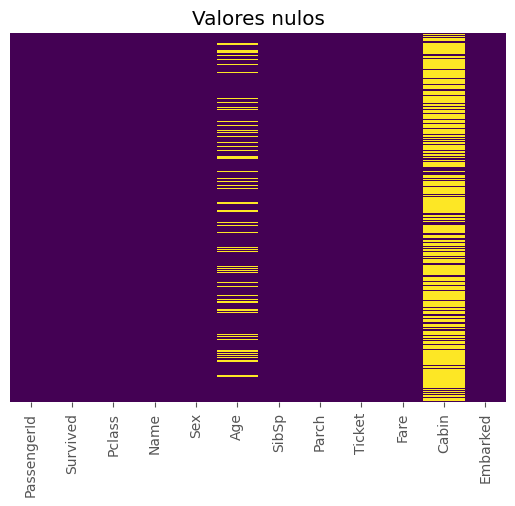

In [10]:
# Visualización de valores nulos
sns.heatmap(titanic_train.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Valores nulos")

plt.show()

### **VARIABLES CATEGÓRICAS**

In [11]:
# Obtener variables categóricas
categoricas = [col for col in titanic_train.columns if titanic_train[col].dtype == "object"]

print(f"Cantidad de columnas categóricas: {len(categoricas)}")
print(f"Columnas categóricas: {categoricas}")

Cantidad de columnas categóricas: 5
Columnas categóricas: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [12]:
# Valores nulos en variables categóricas
titanic_train[categoricas].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [13]:
# Cardinalidad de variables categóricas
for col in categoricas:
    print(col, titanic_train[col].nunique())

Name 891
Sex 2
Ticket 681
Cabin 147
Embarked 3


In [14]:
# Valores únicos de variables con baja cardinalidad
print(titanic_train["Sex"].unique())
print(titanic_train["Embarked"].unique())

['male' 'female']
['S' 'C' 'Q' nan]


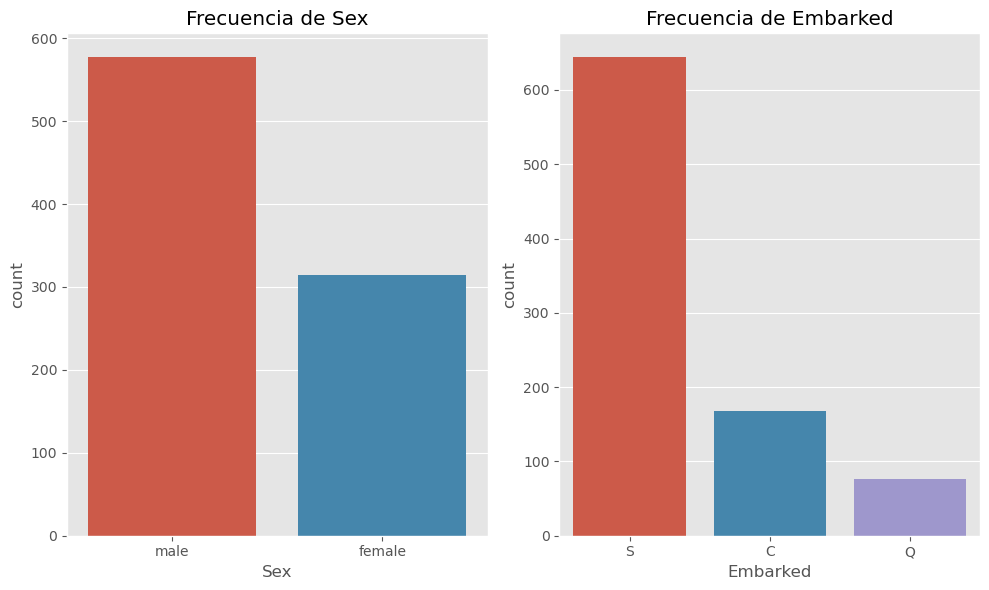

In [15]:
# Frecuencias de sex y embarked (baja cardinalidad)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(["Sex", "Embarked"]):
    ax = axes[i]
    sns.countplot(data=titanic_train, x=col, hue=col, ax=ax, legend=False)
    ax.set_title(f"Frecuencia de {col}")
    
plt.tight_layout()

plt.show()

### **VARIABLES NUMÉRICAS**

In [16]:
# Obtenemos las variables numéricas
numericas = [col for col in titanic_train.columns if titanic_train[col].dtype in ["float64", "int64"]]

print(f"Cantidad de variables numéricas: {len(numericas)}")
print(f"Variables numéricas: {numericas}")

Cantidad de variables numéricas: 7
Variables numéricas: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [17]:
# Valores nulos en variables numéricas
numericas.remove("PassengerId") # PassengerId es un identificador por lo que su análisis no aporta info adicional

titanic_train[numericas].isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [18]:
# Conteo de valores
for col in numericas:
    print(titanic_train[col].value_counts(), "\n")

Survived
0    549
1    342
Name: count, dtype: int64 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64 

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64 

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64 

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64 



In [19]:
# Resumen estadístico del dataset
titanic_train.describe().T 

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [20]:
# Observar la presencia de outliers
def detectar_outliers(df, columnas):
    conteo = {}
    for col in columnas:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        limite_superior = q3 + iqr * 1.5
        limite_inferior = q1 - iqr * 1.5
        
        conteo_out = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        
        conteo[col] = conteo_out.shape[0]
        
    return conteo
    
detectar_outliers(titanic_train, numericas)

{'Survived': 0, 'Pclass': 0, 'Age': 11, 'SibSp': 46, 'Parch': 213, 'Fare': 116}

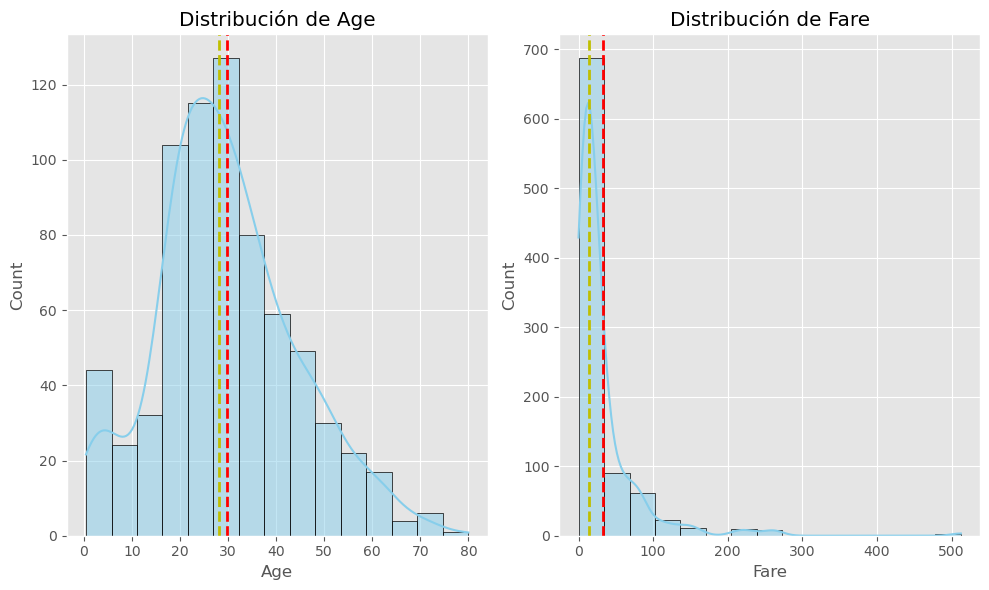

In [21]:
# Distribución de variables numéricas continuas
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(["Age", "Fare"]):
    ax = axes[i]
    sns.histplot(data=titanic_train, x=col, bins=15, color="skyblue", edgecolor="black", ax=ax, kde=True)
    ax.axvline(titanic_train[col].mean(), color="r", linestyle="--", linewidth=2, label="Media")
    ax.axvline(titanic_train[col].median(), color="y", linestyle="--", linewidth=2, label="Mediana")
    ax.set_title(f"Distribución de {col}")
    
plt.tight_layout()

plt.show()

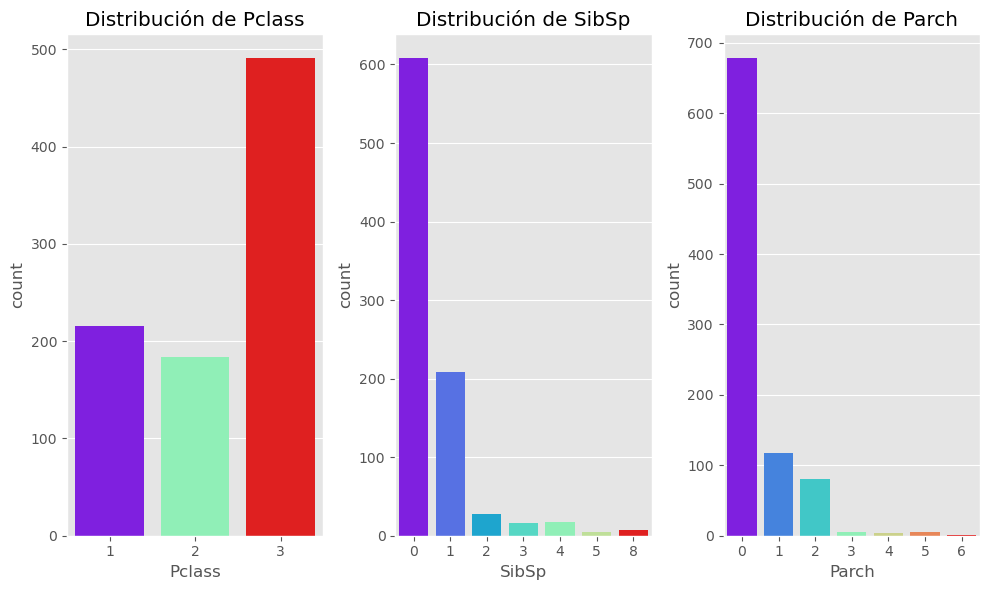

In [22]:
# Distribución de variables numéricas discretas
fig, axes = plt.subplots(1, 3, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(["Pclass", "SibSp", "Parch"]):
    ax = axes[i]
    sns.countplot(data=titanic_train, x=col, hue=col, ax=ax, legend=False, palette="rainbow")
    ax.set_title(f"Distribución de {col}")
    
plt.tight_layout()

plt.show()

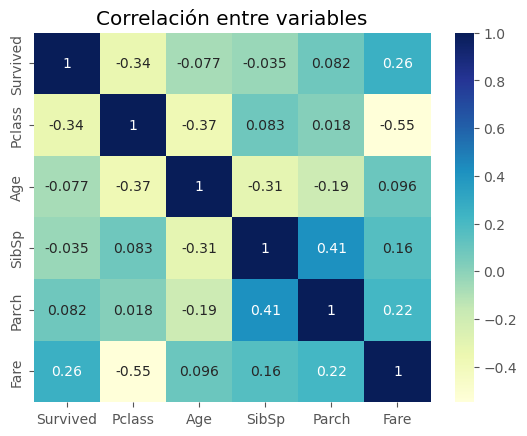

In [23]:
# Correlación de variables numéricas
correlacion = titanic_train[numericas].corr()

sns.heatmap(correlacion, annot=True, cmap="YlGnBu")

plt.title("Correlación entre variables")

plt.show()

### **VARIABLE TARGET**

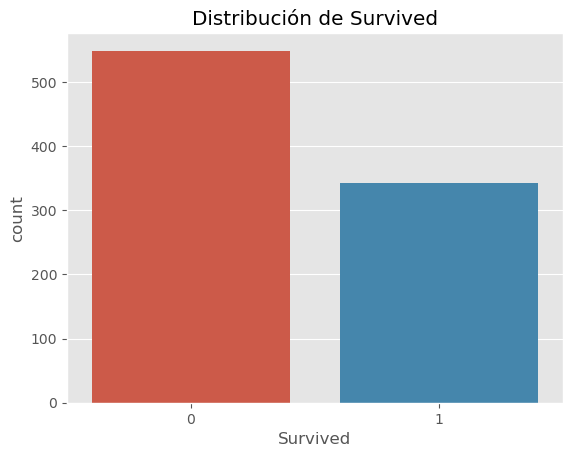

In [24]:
# Distribución variable target 'Supervivencia'
sns.countplot(data=titanic_train, x="Survived", hue="Survived", legend=False)

plt.title("Distribución de Survived")

plt.show()

In [25]:
# Supervivencia por género
titanic_train.groupby("Sex")["Survived"].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

In [26]:
# Supervivencia por clase
titanic_train.groupby("Pclass")["Survived"].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

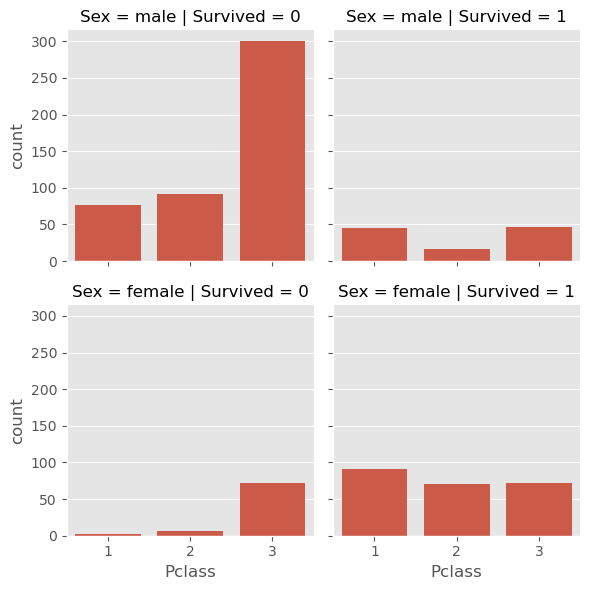

In [27]:
# Supervivencia por género y clase
g = sns.FacetGrid(titanic_train, col="Survived", row="Sex")
g.map(sns.countplot, "Pclass")

plt.show()

In [28]:
# Valor de ticket promedio por supervivencia
titanic_train.groupby("Survived")["Fare"].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [29]:
# Valor de ticket promedio por clase y supervivencia
titanic_train.groupby(["Pclass", "Survived"])["Fare"].agg(["mean", "count"])

mean  count
Pclass Survived                  
1      0         64.684007     80
       1         95.608029    136
2      0         19.412328     97
       1         22.055700     87
3      0         13.669364    372
       1         13.694887    119

In [30]:
# ANOVA de tarifas por clase
from scipy.stats import f_oneway
primera_clase = titanic_train[titanic_train["Pclass"] == 1]["Fare"]
segunda_clase = titanic_train[titanic_train["Pclass"] == 2]["Fare"]
tercera_clase = titanic_train[titanic_train["Pclass"] == 3]["Fare"]

f_test, p_value = f_oneway(primera_clase, segunda_clase, tercera_clase)
print(f"F-Statistic: {f_test}")
print(f"p_value: {p_value}")

F-Statistic: 242.34415651744814
p_value: 1.0313763209141171e-84


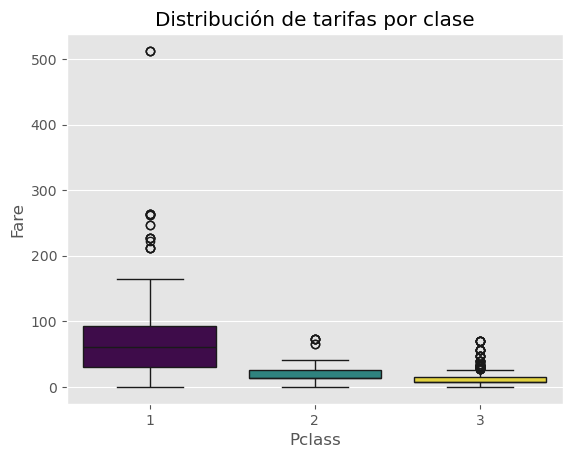

In [31]:
# Visualizar ANOVA
sns.boxplot(x="Pclass", y="Fare", hue="Pclass", data=titanic_train, palette="viridis", legend=False)

plt.title("Distribución de tarifas por clase")

plt.show()

### **CONCLUSIONES DEL ANÁLISIS**

##### 1. El dataset tiene 12 características, siendo 'Survived' la variable target.
##### 2. El dataset no contiene valores duplicados.
##### 3. El dataset contiene 10692 datos, de los cuales 866 (8,1%) son valores nulos.
##### 4. Los 866 valores nulos están distribuidos de la siguiente forma:
- 177 presentes en la columna 'Age', donde adoptaremos la imputación de la mediana ya que es robusta a outliers.
- 2 presentes en la columna 'Embarked', donde adoptaremos la imputación de la moda.
- 687 presentes en la columna 'Cabin', que representa un 77,1% de la columna por lo que la eliminaremos.
##### 5. La columna 'PassengerId' no aporta valor al modelo por lo que la eliminaremos.
##### 6. Las columnas 'Name' y 'Ticket' tienen una alta cardinalidad y no aportarán valor al modelo por lo que las eliminaremos.
##### 7. Observamos que más personas fallecieron de las que sobrevivieron ('Survived' == 0 > 'Survived' == 1). 
##### También podemos ver que casi un 75% de las mujeres sobrevivieron, valor muy alejado al casi 19% de los hombres.
##### Cuando pasamos a observar la clase del pasajero observamos algo similar, ya que de primera clase sobrevivieron un 63% de las personas, que se reduce para la segunda clase a casi un 50%, y en cuanto a la tercera clase observamos que solamente un 25% sobrevive. 
##### Podríamos decir que si una mujer es de primera clase es casi seguro que sobrevivió, mientras que si un hombre es de tercera clase lo más probable es que haya fallecido.
##### 8. El ticket promedio de la persona fallecida es de $22, mientras que el de los sobrevivientes es de $48, poco más del doble. Como vimos antes, se relaciona con el hecho de que la primera clase tiene el mayor índice de supervivencia. Realizamos un ANOVA que corrobora esto.

**Ahora que tenemos una mejor idea de los datos pasamos a realizar la limpieza/modificación y el modelado.**

## **PREPROCESAMIENTO DE LOS DATOS**

In [32]:
# Eliminamos columnas
titanic_train.drop(columns=["PassengerId", "Ticket", "Cabin", "Name"], inplace=True)

titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
# Imputar, estandarizar y codificar variables
imputar_num = SimpleImputer(strategy="median")
imputar_cat = SimpleImputer(strategy="most_frequent")
estandarizar_num = StandardScaler()
encodear_sex = LabelEncoder()
encodear_embarked = LabelEncoder()
# Variables numéricas
titanic_train["Age"] = imputar_num.fit_transform(titanic_train[["Age"]])
titanic_train["Fare"] = imputar_num.fit_transform(titanic_train[["Fare"]])
titanic_train["Age"] = estandarizar_num.fit_transform(titanic_train[["Age"]])
titanic_train["Fare"] = estandarizar_num.fit_transform(titanic_train[["Fare"]])
# Variables categóricas
titanic_train["Sex"] = imputar_cat.fit_transform(titanic_train[["Sex"]]).ravel()
titanic_train["Embarked"] = imputar_cat.fit_transform(titanic_train[["Embarked"]]).ravel()
titanic_train["Sex"] = encodear_sex.fit_transform(titanic_train["Sex"])
titanic_train["Embarked"] = encodear_embarked.fit_transform(titanic_train["Embarked"])

In [34]:
# Agregamos una columna con el total de miembros de familia del pasajero
titanic_train["Total_fam_members"] = titanic_train["SibSp"] + titanic_train["Parch"] + 1 # Cantidad de familiares + 1 (pasajero)

titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_fam_members
0,0,3,1,-0.565736,1,0,-0.502445,2,2
1,1,1,0,0.663861,1,0,0.786845,0,2
2,1,3,0,-0.258337,0,0,-0.488854,2,1
3,1,1,0,0.433312,1,0,0.420730,2,2
4,0,3,1,0.433312,0,0,-0.486337,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.181487,0,0,-0.386671,2,1
887,1,1,0,-0.796286,0,0,-0.044381,2,1
888,0,3,0,-0.104637,1,2,-0.176263,2,4
889,1,1,1,-0.258337,0,0,-0.044381,0,1


## **FEATURES Y TARGET**

In [35]:
# Dividir en características y variable a predecir
X = titanic_train.drop("Survived", axis=1)

y = titanic_train["Survived"]

## **CONJUNTOS DE ENTRENAMIENTO Y VALIDACIÓN**

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

In [37]:
estructura_dataset(X_train)

Cantidad de filas: 712
Cantidad de columnas: 8
Cantidad de datos: 5696
Cantidad de valores nulos: 0
Columnas: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Total_fam_members'],
      dtype='object')


In [38]:
estructura_dataset(X_val)

Cantidad de filas: 179
Cantidad de columnas: 8
Cantidad de datos: 1432
Cantidad de valores nulos: 0
Columnas: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Total_fam_members'],
      dtype='object')


## **MODELADO**

In [39]:
# Variable donde almacenar las métricas de los modelos
modelos = []

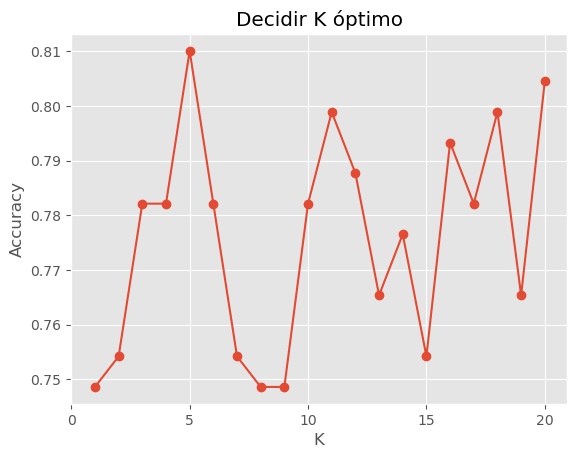

In [40]:
# Decidir k óptimo para KNN
rango = range(1, 21)
inertia = []

for n_neighbors in rango:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    inertia.append(knn.score(X_val, y_val))
    
plt.plot(rango, inertia, marker="o")
plt.title("Decidir K óptimo")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks([0, 5, 10, 15, 20])

plt.show()

In [41]:
# Aplicamos el modelo con el k obtenido
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_val)

knn_accuracy = round(accuracy_score(y_val, y_pred_knn), 2)

modelos.append({
    "Modelo": "KNN",
    "Accuracy": knn_accuracy})

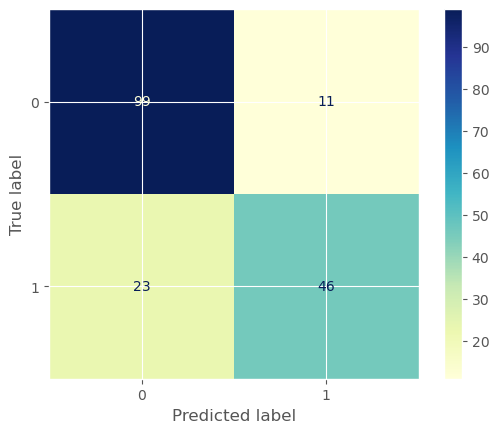

In [42]:
# Matriz de confusión de KNN
conf_matrix = confusion_matrix(y_val, y_pred_knn)
disp = ConfusionMatrixDisplay(conf_matrix)

disp.plot(cmap="YlGnBu")

In [43]:
# Reporte de clasificación
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       110
           1       0.81      0.67      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



In [44]:
# Bayes ingenuo gaussiano
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_val)

gnb_accuracy = round(accuracy_score(y_val, y_pred_gnb), 2)

modelos.append({
    "Modelo": "GNB",
    "Accuracy": gnb_accuracy})

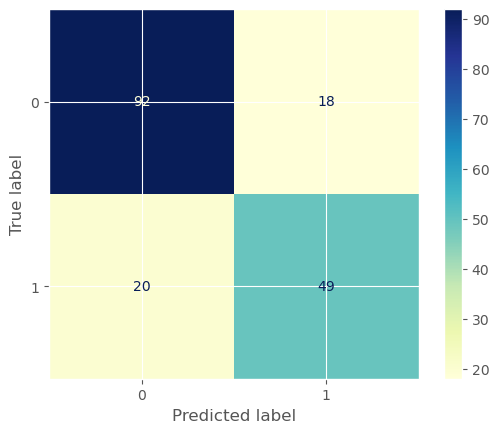

In [45]:
# Matriz de confusión de GNB
conf_matrix = confusion_matrix(y_val, y_pred_gnb)
disp = ConfusionMatrixDisplay(conf_matrix)

disp.plot(cmap="YlGnBu")

In [46]:
# Reporte de clasificación de GNB
print(classification_report(y_val, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [47]:
# Profundidad óptima
depth = [i + 1 for i in range(20)]
score_train = []
score_test = []
for dep in depth:
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=dep, random_state=16)
    tree.fit(X_train, y_train)
    score_train.append(tree.score(X_train, y_train))
    score_test.append(tree.score(X_val, y_val))

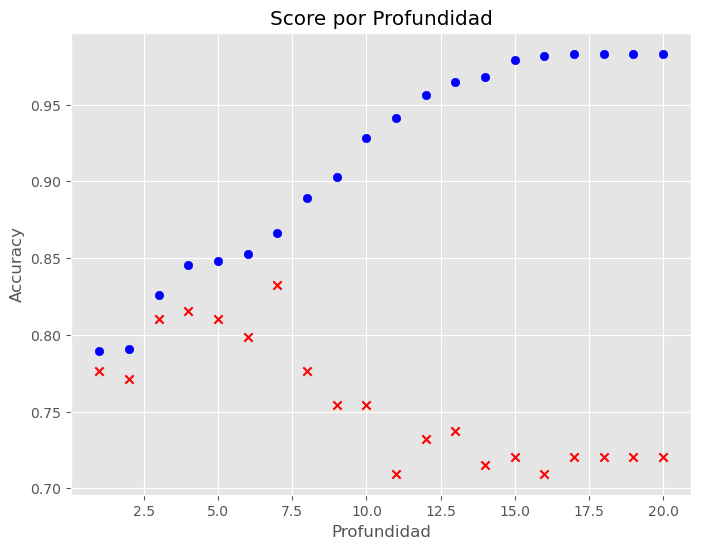

In [48]:
# Profundidad por score
plt.figure(figsize=(8, 6))
plt.scatter(x=depth, y=score_train, marker="o", color="blue")
plt.scatter(x=depth, y=score_test, marker="x", color="red")
plt.title("Score por Profundidad")
plt.xlabel("Profundidad")
plt.ylabel("Accuracy")

plt.show()

In [49]:
# Mínimo de hojas óptimo
samplex = [i + 1 for i in range(20)]
score_train1 = []
score_test1 = []
for sample in samplex:
    tree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=sample, random_state=16)
    tree.fit(X_train, y_train)
    score_train1.append(tree.score(X_train, y_train))
    score_test1.append(tree.score(X_val, y_val))

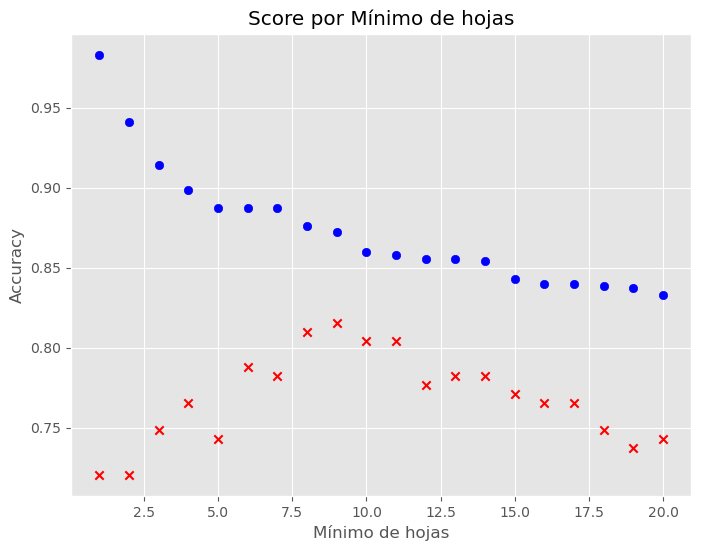

In [50]:
# Mínimo de hojas por score
plt.figure(figsize=(8, 6))
plt.scatter(x=samplex, y=score_train1, marker="o", color="blue")
plt.scatter(x=samplex, y=score_test1, marker="x", color="red")
plt.title("Score por Mínimo de hojas")
plt.xlabel("Mínimo de hojas")
plt.ylabel("Accuracy")

plt.show()

In [51]:
# Árboles de decisión
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=7, min_samples_leaf=9)

dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_val)

dtc_accuracy = round(accuracy_score(y_val, y_pred_dtc), 2)

modelos.append({
    "Modelo": "Decision Trees",
    "Accuracy": dtc_accuracy})

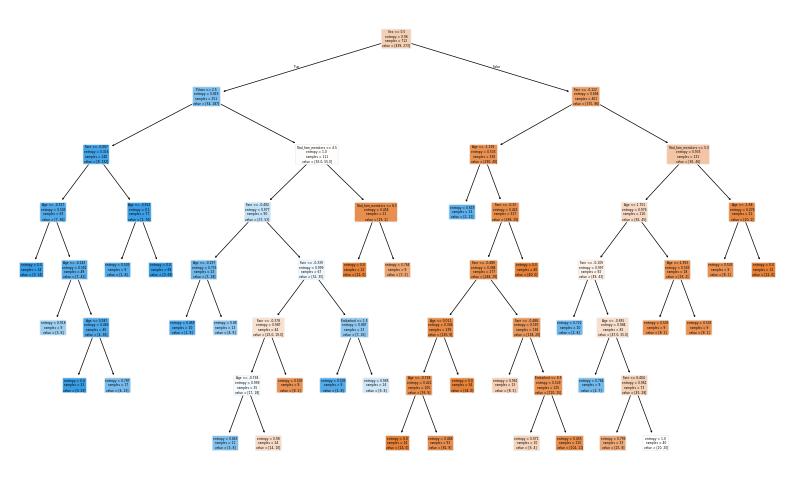

In [52]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(dtc, filled=True, rounded=True, feature_names=X.columns)

plt.show()

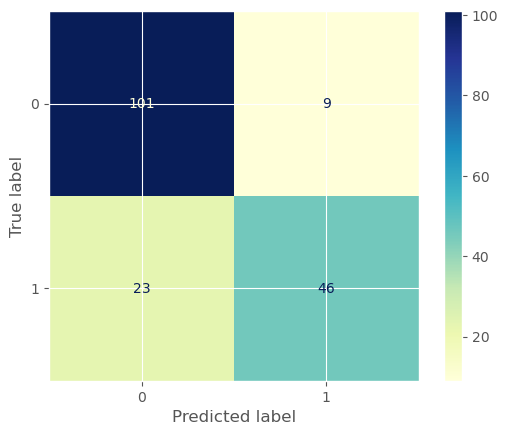

In [53]:
# Matriz de confusión de Decision Trees
conf_matrix = confusion_matrix(y_val, y_pred_dtc)
disp = ConfusionMatrixDisplay(conf_matrix)

disp.plot(cmap="YlGnBu")

In [54]:
# Reporte de clasificación de Decision Trees
print(classification_report(y_val, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.84      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [55]:
# XGBoost
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_val)

xgb_accuracy = round(accuracy_score(y_val, y_pred_xgb), 2)

modelos.append({
    "Modelo": "XGBoost",
    "Accuracy": xgb_accuracy})

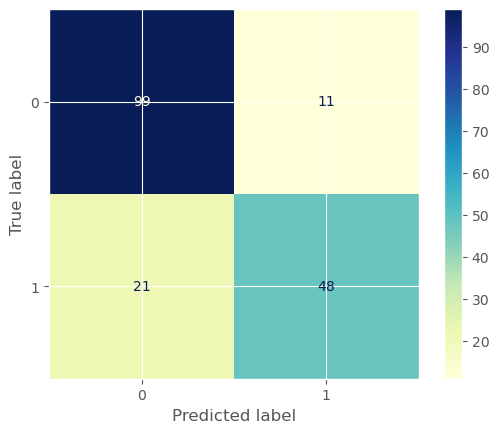

In [56]:
# Matriz de confusión de XGBoost
conf_matrix = confusion_matrix(y_val, y_pred_xgb)
disp = ConfusionMatrixDisplay(conf_matrix)

disp.plot(cmap="YlGnBu")

In [57]:
# Reporte de clasificación de XGBoost
print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [58]:
# Accuracy de los modelos
modelos = pd.DataFrame(modelos)

modelos.sort_values(by="Accuracy", ascending=False)

,Modelo,Accuracy
2,Decision Trees,0.82
3,XGBoost,0.82
0,KNN,0.81
1,GNB,0.79


##### Luego de utilizar 4 modelos de ML, observamos que todos tienen una performance similar, pero finalmente elegimos XGBoost como clasificador ya que su F1-SCORE (relación entre accuracy y recall) es la mayor de los 4 modelos. Finalizaremos el proyecto cargando los datos de prueba y ajustaremos el modelo XGBoost a ellos, luego de entrenarlo con todos los datos del dataset titanic_train, para aprovechar al máximo la información disponible.

In [59]:
# Datos para testear los modelos
ruta_test = r"C:\Users\Educa informatica\Downloads\Titanic_test.csv"

# Dataset de prueba
titanic_test = pd.read_csv(ruta_test)

In [60]:
# Resumen de los datos para prueba del modelo
estructura_dataset(titanic_test)

Cantidad de filas: 418
Cantidad de columnas: 11
Cantidad de datos: 4598
Cantidad de valores nulos: 414
Columnas: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [61]:
# Información relevante
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [62]:
# Aplicar los mismos pasos que en los datos de entrenamiento
titanic_test.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

titanic_test["Age"].fillna(titanic_train["Age"].median(), inplace=True) # Imputar valores nulos con la mediana
titanic_test["Fare"].fillna(titanic_train["Fare"].median(), inplace=True) # Imputar valores nulos con la mediana

titanic_test["Sex"] = LabelEncoder().fit_transform(titanic_test["Sex"]) # Encodear sexo
titanic_test["Embarked"] = LabelEncoder().fit_transform(titanic_test["Embarked"]) # Encodear puerto de embarcación

titanic_test["Total_fam_members"] = titanic_test["SibSp"] + titanic_test["Parch"] + 1 # Total de miembros de la familia (+1 es por el pasajero)
# Caracteristicas
X_test = titanic_test.drop("PassengerId", axis=1)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             418 non-null    int64  
 1   Sex                418 non-null    int32  
 2   Age                418 non-null    float64
 3   SibSp              418 non-null    int64  
 4   Parch              418 non-null    int64  
 5   Fare               418 non-null    float64
 6   Embarked           418 non-null    int32  
 7   Total_fam_members  418 non-null    int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


In [ ]:
# Modelo final
X_train_completo = pd.concat([X_train, X_val], axis=0) # Juntar todas las características de titanic_train
y_train_completo = pd.concat([y_train, y_val], axis=0) # Juntar la variable target de titanic_train

In [66]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base

# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train_completo, y_train_completo)

# Mostrar los mejores hiperparámetros y el mejor score
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)

# Modelo optimizado
mejor_modelo = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Mejor score: 0.8394953235829515


In [67]:
predicciones = mejor_modelo.predict(X_test) # Predicciones finales

In [68]:
# Visualizar los resultados
resultados = pd.DataFrame({"PassengerId": titanic_test["PassengerId"],
                          "Survived": predicciones})

resultados

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
